In [80]:
import numpy as np
import astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import pylab
from pylab import plot
from astropy.cosmology import WMAP9 as cosmo
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'


In [81]:
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data

#print w 
#print r 

Reading files


In [82]:
print 'catalog with values RA and DEC'
cw = SkyCoord(ra = w['RAJ2000']*u.degree, dec = w['DEJ2000']*u.degree) 
cr = SkyCoord(ra = r['RA']*u.degree, dec = r['DEC']*u.degree) 

catalog with values RA and DEC


Histograms


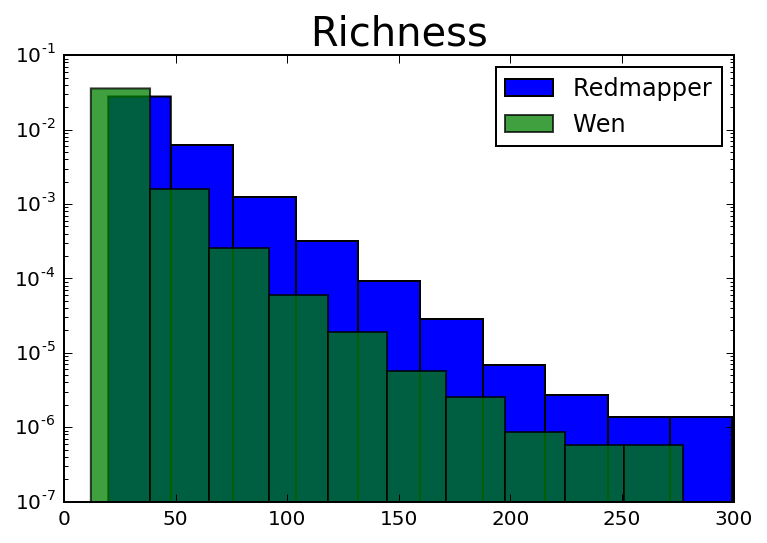

In [83]:
print 'Histograms'
h_r = plt.hist((r['LAMBDA']), normed=True, log = True, label = 'Redmapper')
h_r = plt.hist((w['RL*']), normed=True, log = True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('Richness', fontsize = '20')

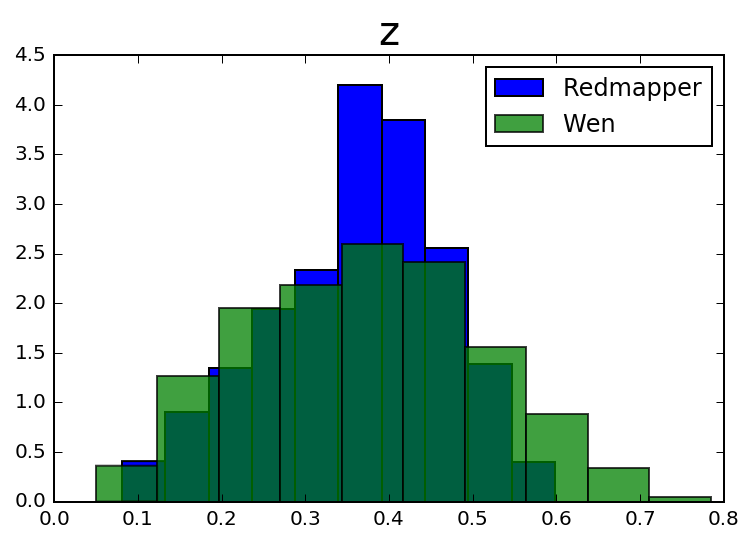

In [84]:
h_z = plt.hist(r['z_lambda'], normed=True, label = 'Redmapper')
h_z = plt.hist(w['zph'], normed=True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('z', fontsize='20')

In [85]:
print 'match to catalog sky'
idx, d2d, d3d = cw.match_to_catalog_sky(cr) 
#print idx, d2d, d3d 


print 'match to catalog sky'
idx, d2d, d3d = cr.match_to_catalog_sky(cw) 
#print idx, d2d, d3d 

match to catalog sky
match to catalog sky


Plot ra x dec - sky


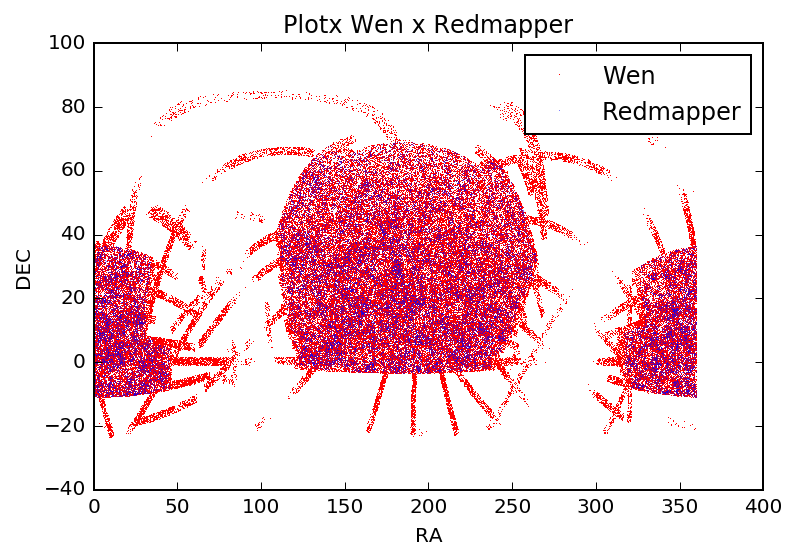

In [86]:
print 'Plot ra x dec - sky'
ra_w = w['RAJ2000']*u.deg
dec_w = w['DEJ2000']*u.deg

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(ra_w, dec_w, 'r,', label = 'Wen')

ra_r = r['RA']*u.deg 
dec_r = r['DEC']*u.deg

ax.plot(ra_r, dec_r, 'b,', label = 'Redmapper', alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')

ax.legend(numpoints=1)
plt.title('Plotx Wen x Redmapper')
#savefig('Plot-Sky.png')
 

We need to verify the distribution of redshift and richness of both original samples and matched.

We need to check that the match works by plotting position of matched over original (use plot limits such that you are able to discern them (zoom)).

z vs z (matched), richness vs richness (matched).

catalog with values RA, DEC and z
Plot ra, dec and z - 3d


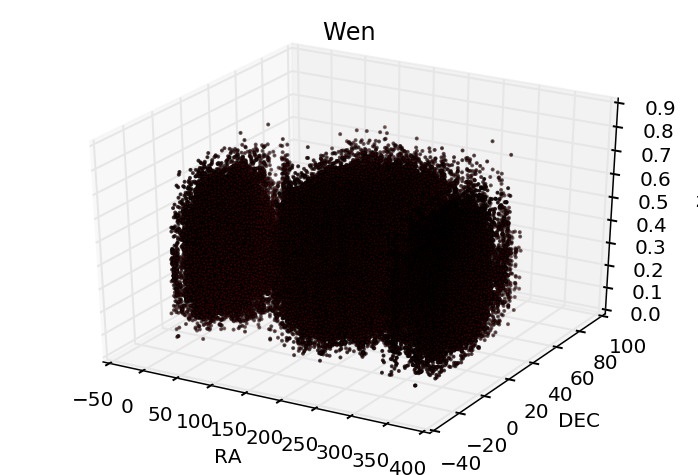

In [87]:
print 'catalog with values RA, DEC and z'
c_w = SkyCoord(ra = w['RAJ2000']*u.deg, dec = w['DEJ2000']*u.deg, distance = cosmo.comoving_distance(w['zph'])) 
c_r = SkyCoord(ra = r['RA']*u.deg, dec = r['DEC']*u.deg, distance = cosmo.comoving_distance(r['Z_LAMBDA']))



print 'Plot ra, dec and z - 3d'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [w['RAJ2000']]
y = [w['DEJ2000']]
z = [w['zph']]

ax.scatter(x,y,z, c='r', marker = 'o', s=1)

ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_zlabel('z')
ax.set_title('Wen')

#savefig('Plot-3d-Wen.png'), close()

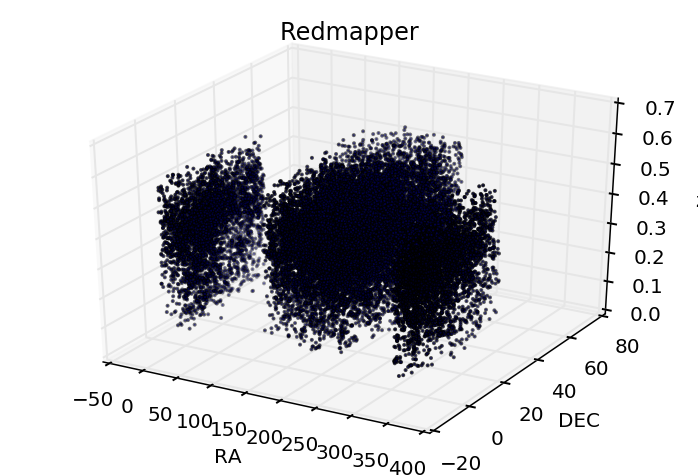

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

a = [r['RA']]
b = [r['DEC']]
c = [r['Z_LAMBDA']]

ax.scatter(a,b,c, c='b', marker = 'o', s=1)

ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_zlabel('z')
ax.set_title('Redmapper')

#savefig('Plot-3d-Red.png')

In [89]:
print 'match to catalog 3d'
idx, d2d, d3d = c_w.match_to_catalog_3d(c_r) 
#print idx, d2d, d3d 

print 'match to catalog 3d'
idx, d2d, d3d = c_r.match_to_catalog_3d(c_w) 
#print idx, d2d, d3d 

match to catalog 3d
match to catalog 3d


Objects around to catalog sky
 Histogram z - Sky 


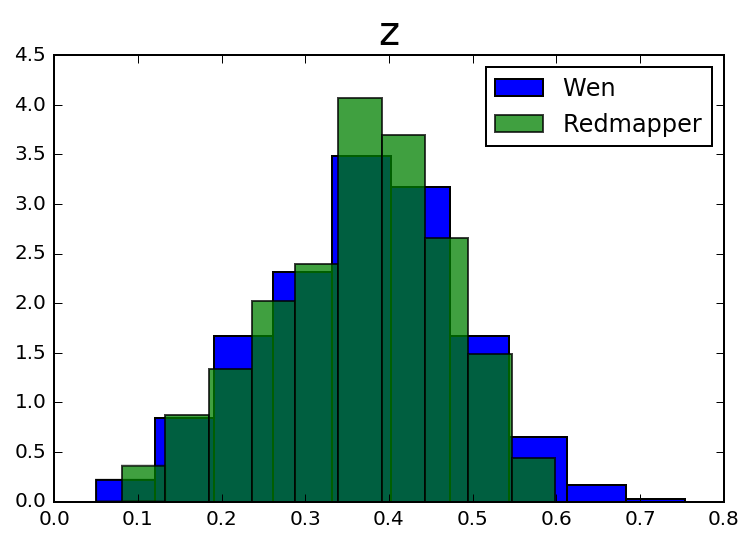

In [143]:
print 'Objects around to catalog sky'
idxcw, idxcr, d2d, d3d = cr.search_around_sky(cw, 4*u.arcmin)
#print idxc_w, idxc_r, d2d, d3d 

print ' Histogram z - Sky '
objw = idxcw
objr = idxcr

o_w = w[objw]
o_r = r[objr]

ho_z = plt.hist(o_w['zph'], normed=True, label = 'Wen')
ho_z = plt.hist(o_r['Z_LAMBDA'], normed=True, label = 'Redmapper', alpha=0.75)
plt.title('z', fontsize='20')
plt.legend()

Plot z - Sky 


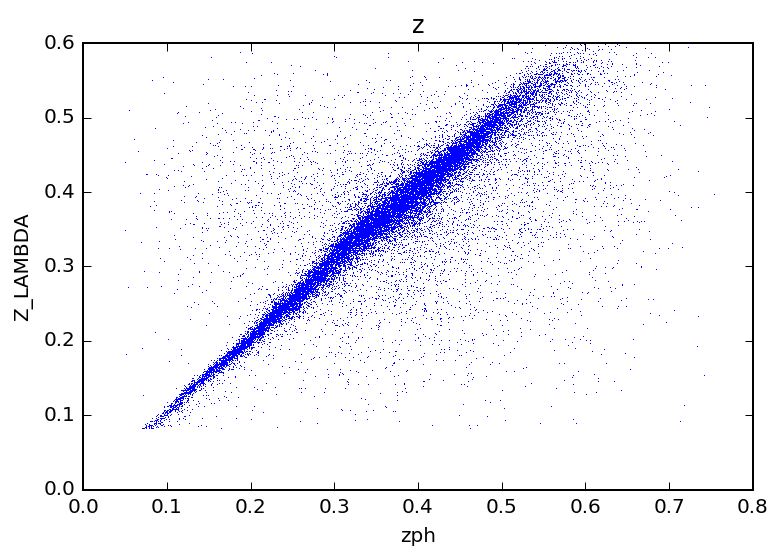

In [145]:
print 'Plot z - Sky '
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_w['zph'], o_r['Z_LAMBDA'], 'b,')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

Histogram richness - Sky


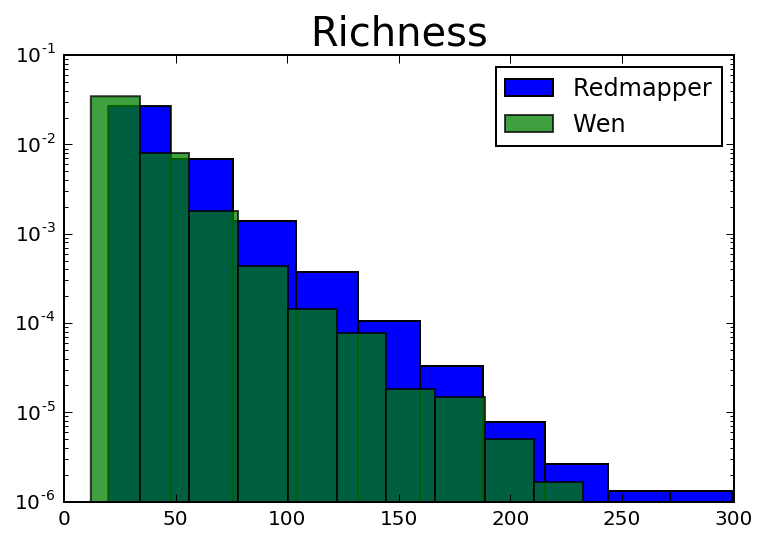

In [132]:
print 'Histogram richness - Sky'
ho_r = plt.hist(o_r['LAMBDA'], normed=True, log=True, label='Redmapper')
ho_r = plt.hist(o_w['RL*'], normed=True, log=True, label='Wen', alpha=0.75)
plt.legend()
plt.title('Richness', fontsize='20')

Plot richness - Sky


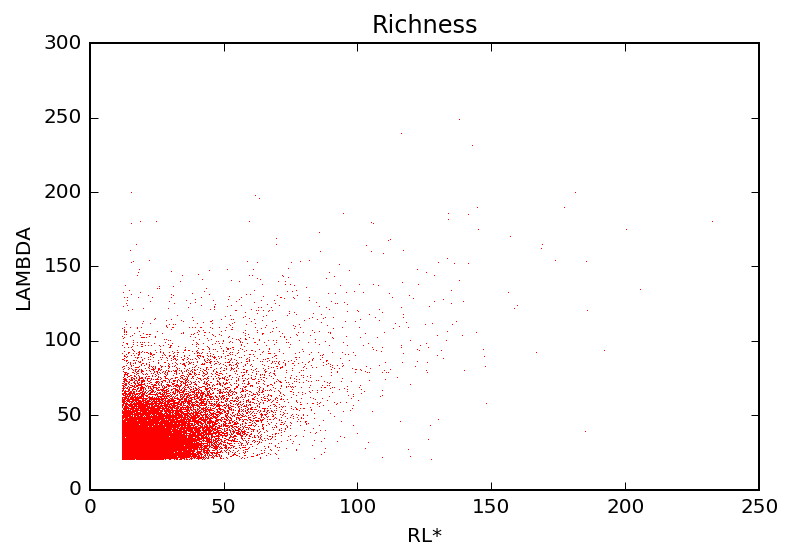

In [135]:
print 'Plot richness - Sky'
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_w['RL*'], o_r['LAMBDA'], 'r,')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness')


idxcw, idxcr, d2d, d3d = cw.search_around_sky(cr, 4*u.arcmin)
#print idxc_w, idxc_r, d2d, d3d 

Objects around to catalog 3d
Histogram z - 3D


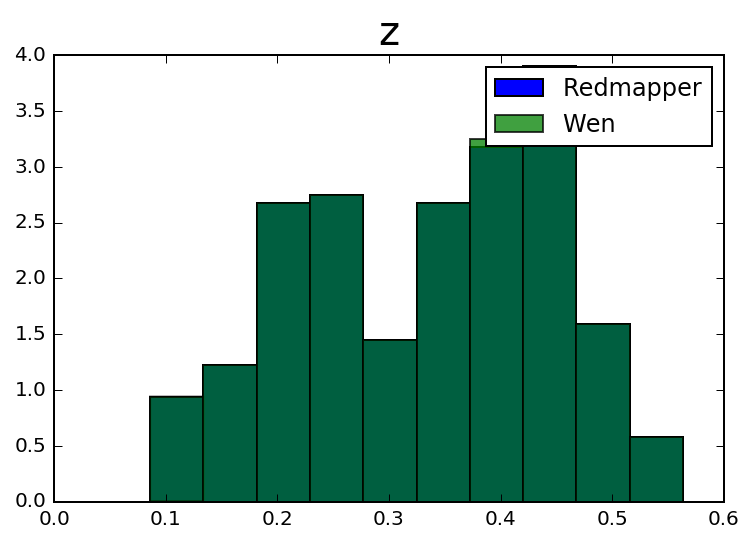

In [155]:
print 'Objects around to catalog 3d'
idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, 1000*u.kpc) 
#print idxc_w, idexc_r, d2d, d3d

print 'Histogram z - 3D'

obje_w = idxc_w
obje_r = idxc_r

o_we = w[obje_w]
o_re = r[obje_r]

ho_z = plt.hist(o_re['Z_LAMBDA'], normed=True, label = 'Redmapper')
ho_z = plt.hist(o_we['zph'], normed=True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('z', fontsize='20')

Plot z - 3D


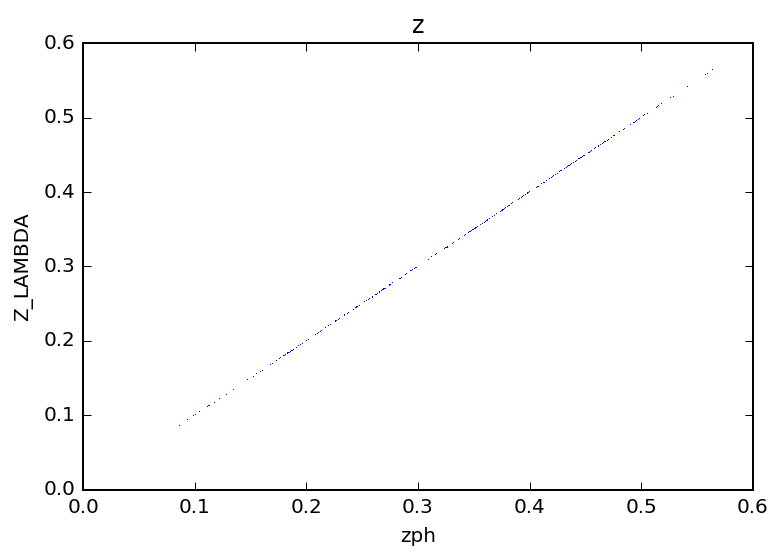

In [167]:
print 'Plot z - 3D'

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_we['zph'], o_re['Z_LAMBDA'], 'b,')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

Histogram richness - 3d


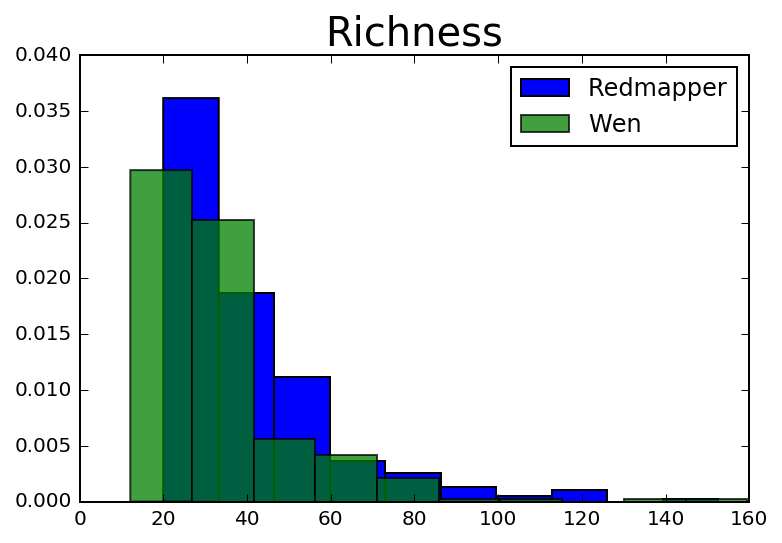

In [138]:
print 'Histogram richness - 3d'
ho_r = plt.hist(o_re['LAMBDA'], normed=True, label = 'Redmapper')
ho_r = plt.hist(o_we['RL*'], normed=True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('Richness', fontsize='20')

Plot richness - 3d


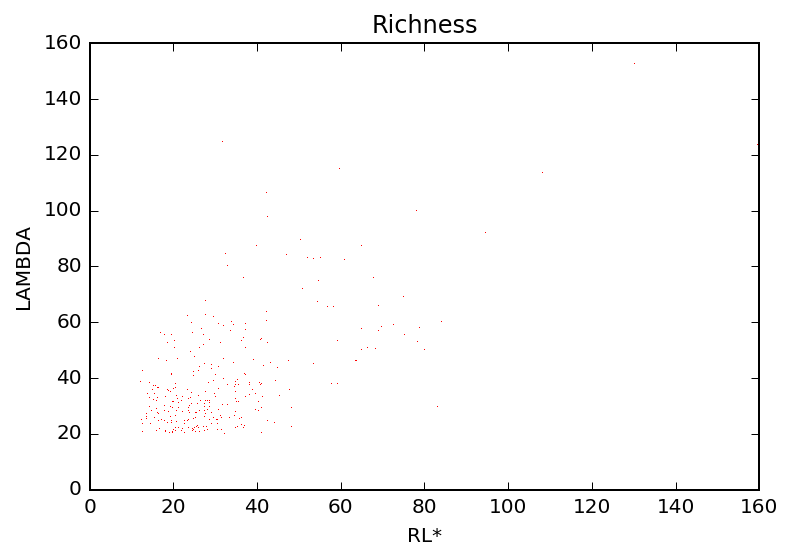

In [170]:
print 'Plot richness - 3d'

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_we['RL*'], o_re['LAMBDA'], 'r,')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness')

idxc_w, idxc_r, d2d, d3d = c_w.search_around_3d(c_r, 1000*u.kpc)
#print idxc_w, idexc_r, d2d, d3d  

Plot ra, dec and z - 3d - match


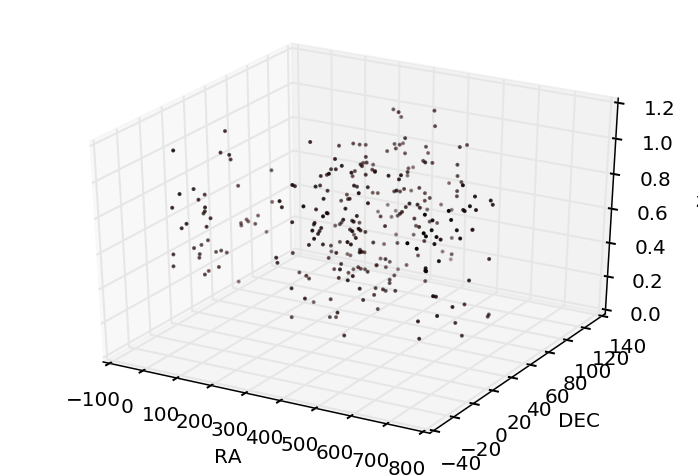

In [140]:
print 'Plot ra, dec and z - 3d - match'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [o_we['RAJ2000'] + o_re['RA']]
y = [o_we['DEJ2000'] + o_re['DEC']]
z = [o_we['zph'] + o_re['Z_LAMBDA']]

ax.scatter(x,y,z, c='r', marker = 'o', s=1)

ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_zlabel('z')